In [24]:
# !pip install fasttext
# !pip install keras-tuner
# !pip install pymoo
# !pip install binance
# !pip install binance-futures-connector
# !pip install joblib
# !pip install scikit-learn==1.4.2
# !pip install ta_lib-0.4.25-cp311-cp311-win_amd64.whl
# !pip install ace_tools

In [25]:
import pandas as pd
import numpy as np
import requests
import fasttext
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from binance.um_futures import UMFutures
from sklearn.ensemble import IsolationForest
import plotly.express as px

ISOLATION_FOREST_CONTAMINATION = 'auto'

# Reading datsets

In [26]:
# Lost data :(
# names_symbols = pd.read_csv(r'C:\Cloud\filips19mail\github\solanaDEXtokenCollector\data\names_and_symbols.csv')
# names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
# names_symbols.reset_index(drop=True, inplace=True)
# names_symbols

In [27]:
df = pd.read_csv('data/tokens_raw.csv')
df.drop_duplicates(subset=['pairAddress'], inplace=True)
df = df.loc[df['worthy'] != -1]
df

chainId    dexId                                                url  \
0      solana  raydium  https://dexscreener.com/solana/fufvvnedkwd1ay9...   
1      solana  raydium  https://dexscreener.com/solana/7kgyryt4f6swhge...   
2      solana  raydium  https://dexscreener.com/solana/3jmhcpdsabsvvwv...   
3      solana  raydium  https://dexscreener.com/solana/87pyekwlyzywj5x...   
4      solana  raydium  https://dexscreener.com/solana/ftdsownvjufsblk...   
...       ...      ...                                                ...   
41559  solana  meteora  https://dexscreener.com/solana/dhjtkpxrk9unln2...   
41560  solana  raydium  https://dexscreener.com/solana/7mss2ve5hy22aqp...   
41561  solana  meteora  https://dexscreener.com/solana/99wepb3eleehu5j...   
41562  solana  meteora  https://dexscreener.com/solana/6vzzcm33keqvtjs...   
41563  solana  meteora  https://dexscreener.com/solana/edawhhjlq6ur2nh...   

                                        pairAddress  \
0      FUFVVNEdkwd1aY9sWzFpJK7HsjSLGNXhRuKYD1Hq4ZXM   
1      7kGYRyt4F6sWhGEqptZFsPvRTDKLxgKmpk692imgDztS   
2      3jmHCPDSabSvvwV4rb99kMYdq1h2K5re9MzKqPjgMxxT   
3      87PYEkWLYzYWj5xTQ2x88TeMnqi4bBpeCbzqtRfw16q7   
4      FTDSownvJUfsBLKaumJimVjwidb7pYVH1mcyooQevuob   
...                                             ...   
41559  DHjtKPXrK9UNLN2hv9gmok7EkSKRhKX548zCaLCvhGMy   
41560  7mSS2Ve5Hy22AQPFeXqBbnz7XUVhwFCSsqEHHnDXVG96   
41561  99WEPb3eLEeHu5JQapyRpD3gVUuoBX5L47R9Rtnh1irW   
41562  6VzZCM33KeqvtJsa8kbbGwrUFguKkoapbMskCtZD7RUK   
41563  EdAWhhJLQ6Ur2NHg7kAMGCoNhQbx6i4fo7CpxFV2zN92   

                                   baseTokenAddress             baseTokenName  \
0      4URTsrcoUXuUmoX8UZE5v3KYK2ER8GWxJCf8NZAPHx7r                  FIZZ CAT   
1      A9d7aRfM6CsQaMuhYnzPJhfoFFEEewwCt9ewBkCRRAMo              FIZZ THE CAT   
2      EYt6hGWj5iYjYVkbUbhhWAMVVkmavm2pot1QXREptQzc                 Angry Cat   
3      3xJAntCCUKhYuvJn4qLdrGv6XJaamFcjguBpRhiDfDUs  Courage the Cowardly Dog   
4      J5ExmBAEXFFdsgZ1mf5bibGGHjHJ1tPPqytqEXGUshY7           DOP DOP YES YES   
...                                             ...                       ...   
41559  BDcJS2p3xgitfGaVpnUtxEPjrXMzBWYqBtB35b9Xpump                 TRUMPTARD   
41560  CESMoMU5yYhtdSviZMnvWsc9AH3KqLyN7Cw3KiFS45uE               White House   
41561  BDaNXFW8NST4yXps7TZuizRsj194AeH9tnzZfUQtVuiy              The Trenches   
41562  BeuoCod7mPMZBXE6qhBnYMHSy2AmgrKvXVAmsX4aHR2i                      USDD   
41563  69kdRLyP5DTRkpHraaSZAQbWmAwzF9guKjZfzMXzcbAs             American Coin   

      baseTokenSymbol                             quoteTokenAddress  \
0                FIZZ   So11111111111111111111111111111111111111112   
1                FIZZ   So11111111111111111111111111111111111111112   
2           Angry Cat   So11111111111111111111111111111111111111112   
3                 CCD   So11111111111111111111111111111111111111112   
4             SKIPIDY   So11111111111111111111111111111111111111112   
...               ...                                           ...   
41559       TRUMPTARD   So11111111111111111111111111111111111111112   
41560       President   So11111111111111111111111111111111111111112   
41561          TRENCH   So11111111111111111111111111111111111111112   
41562            USDD  EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v   
41563             USA   So11111111111111111111111111111111111111112   

      quoteTokenName quoteTokenSymbol  ...  BTCUSDT_RSI_4h  BTCUSDT_ULTOSC_4h  \
0        Wrapped SOL              SOL  ...       64.667694          57.435246   
1        Wrapped SOL              SOL  ...       64.766410          57.623686   
2        Wrapped SOL              SOL  ...       64.889033          57.859236   
3        Wrapped SOL              SOL  ...       64.920427          57.919806   
4        Wrapped SOL              SOL  ...       64.851753          57.787449   
...              ...              ...  ...             ...                ...   
41559    Wrapped SOL       

In [28]:
df.reset_index(drop=True, inplace=True)
df['liq_fdv_ratio'] = (df['liquidity_usd']/df['fdv']).replace([np.inf, -np.inf], 0).fillna(0)
df

chainId    dexId                                                url  \
0      solana  raydium  https://dexscreener.com/solana/fufvvnedkwd1ay9...   
1      solana  raydium  https://dexscreener.com/solana/7kgyryt4f6swhge...   
2      solana  raydium  https://dexscreener.com/solana/3jmhcpdsabsvvwv...   
3      solana  raydium  https://dexscreener.com/solana/87pyekwlyzywj5x...   
4      solana  raydium  https://dexscreener.com/solana/ftdsownvjufsblk...   
...       ...      ...                                                ...   
41559  solana  meteora  https://dexscreener.com/solana/dhjtkpxrk9unln2...   
41560  solana  raydium  https://dexscreener.com/solana/7mss2ve5hy22aqp...   
41561  solana  meteora  https://dexscreener.com/solana/99wepb3eleehu5j...   
41562  solana  meteora  https://dexscreener.com/solana/6vzzcm33keqvtjs...   
41563  solana  meteora  https://dexscreener.com/solana/edawhhjlq6ur2nh...   

                                        pairAddress  \
0      FUFVVNEdkwd1aY9sWzFpJK7HsjSLGNXhRuKYD1Hq4ZXM   
1      7kGYRyt4F6sWhGEqptZFsPvRTDKLxgKmpk692imgDztS   
2      3jmHCPDSabSvvwV4rb99kMYdq1h2K5re9MzKqPjgMxxT   
3      87PYEkWLYzYWj5xTQ2x88TeMnqi4bBpeCbzqtRfw16q7   
4      FTDSownvJUfsBLKaumJimVjwidb7pYVH1mcyooQevuob   
...                                             ...   
41559  DHjtKPXrK9UNLN2hv9gmok7EkSKRhKX548zCaLCvhGMy   
41560  7mSS2Ve5Hy22AQPFeXqBbnz7XUVhwFCSsqEHHnDXVG96   
41561  99WEPb3eLEeHu5JQapyRpD3gVUuoBX5L47R9Rtnh1irW   
41562  6VzZCM33KeqvtJsa8kbbGwrUFguKkoapbMskCtZD7RUK   
41563  EdAWhhJLQ6Ur2NHg7kAMGCoNhQbx6i4fo7CpxFV2zN92   

                                   baseTokenAddress             baseTokenName  \
0      4URTsrcoUXuUmoX8UZE5v3KYK2ER8GWxJCf8NZAPHx7r                  FIZZ CAT   
1      A9d7aRfM6CsQaMuhYnzPJhfoFFEEewwCt9ewBkCRRAMo              FIZZ THE CAT   
2      EYt6hGWj5iYjYVkbUbhhWAMVVkmavm2pot1QXREptQzc                 Angry Cat   
3      3xJAntCCUKhYuvJn4qLdrGv6XJaamFcjguBpRhiDfDUs  Courage the Cowardly Dog   
4      J5ExmBAEXFFdsgZ1mf5bibGGHjHJ1tPPqytqEXGUshY7           DOP DOP YES YES   
...                                             ...                       ...   
41559  BDcJS2p3xgitfGaVpnUtxEPjrXMzBWYqBtB35b9Xpump                 TRUMPTARD   
41560  CESMoMU5yYhtdSviZMnvWsc9AH3KqLyN7Cw3KiFS45uE               White House   
41561  BDaNXFW8NST4yXps7TZuizRsj194AeH9tnzZfUQtVuiy              The Trenches   
41562  BeuoCod7mPMZBXE6qhBnYMHSy2AmgrKvXVAmsX4aHR2i                      USDD   
41563  69kdRLyP5DTRkpHraaSZAQbWmAwzF9guKjZfzMXzcbAs             American Coin   

      baseTokenSymbol                             quoteTokenAddress  \
0                FIZZ   So11111111111111111111111111111111111111112   
1                FIZZ   So11111111111111111111111111111111111111112   
2           Angry Cat   So11111111111111111111111111111111111111112   
3                 CCD   So11111111111111111111111111111111111111112   
4             SKIPIDY   So11111111111111111111111111111111111111112   
...               ...                                           ...   
41559       TRUMPTARD   So11111111111111111111111111111111111111112   
41560       President   So11111111111111111111111111111111111111112   
41561          TRENCH   So11111111111111111111111111111111111111112   
41562            USDD  EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v   
41563             USA   So11111111111111111111111111111111111111112   

      quoteTokenName quoteTokenSymbol  ...  BTCUSDT_ULTOSC_4h  BTCUSDT_TSF_4h  \
0        Wrapped SOL              SOL  ...          57.435246    66133.097802   
1        Wrapped SOL              SOL  ...          57.623686    66137.897802   
2        Wrapped SOL              SOL  ...          57.859236    66143.897802   
3        Wrapped SOL              SOL  ...          57.919806    66145.440659   
4        Wrapped SOL              SOL  ...          57.787449    66142.069231   
...              ...              ...  ...                ...             ...   
41559    Wrapped SOL       

# Names and symbols embedding models

In [29]:
# names_symbols = pd.concat([names_symbols, df[['baseTokenName', 'baseTokenSymbol']]], axis=0)
names_symbols = df[['baseTokenName', 'baseTokenSymbol']]
names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
names_symbols.reset_index(drop=True, inplace=True)
names_symbols['baseTokenName'] = names_symbols['baseTokenName'].str.lower()
names_symbols['baseTokenSymbol'] = names_symbols['baseTokenSymbol'].str.lower()
names_symbols

C:\Users\philipz\AppData\Local\Temp\ipykernel_19076\2444019040.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\philipz\AppData\Local\Temp\ipykernel_19076\2444019040.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\philipz\AppData\Local\Temp\ipykernel_19076\2444019040.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

baseTokenName baseTokenSymbol
0                                               fizz cat            fizz
1                                           fizz the cat            fizz
2                                              angry cat       angry cat
3                               courage the cowardly dog             ccd
4                                        dop dop yes yes         skipidy
...                                                  ...             ...
24887                                             mousi           mousi 
24888                                              mousi           mousi
24889  8mejtnu5vvym27m7paigsiqnsijw5ysv6hpzzvc2ib7g /...         fearnot
24890  ecepiw9qvwbazm9towpc1pgfh6mwrduqpv9wnmevpban /...      baseheroes
24891                                       the trenches          trench

[24892 rows x 2 columns]

In [30]:
with open('data/baseTokenNames.txt', 'w', encoding='utf-8') as f:
    for entry in names_symbols['baseTokenName']:  # Zmień na nazwę kolumny, którą chcesz użyć
        f.write(str(entry) + '\n')  # Zapewniamy, że każda wartość jest stringiem

with open('data/baseTokenSymbols.txt', 'w', encoding='utf-8') as f:
    for entry in names_symbols['baseTokenSymbol']:  # Zmień na nazwę kolumny, którą chcesz użyć
        f.write(str(entry) + '\n')  # Zapewniamy, że każda wartość jest stringiem

In [31]:
# names model
model_n = fasttext.train_unsupervised('data/baseTokenNames.txt',
                                      model='skipgram',
                                      dim=30,
                                      minCount=1,
                                      minn=2,
                                      verbose=1)
model_n.save_model('models/names2vec_model.bin')

# symbols model
model_s = fasttext.train_unsupervised('data/baseTokenSymbols.txt',
                                      model='skipgram',
                                      dim=15,
                                      minCount=1,
                                      minn=1,
                                      verbose=1)
model_s.save_model('models/symbols2vec_model.bin')

In [32]:
names_vectors = df['baseTokenName'].astype(str).apply(lambda x: pd.Series(model_n.get_word_vector(x)))
names_vectors.columns = [f'nameVectorDim{i}' for i in range(30)]
names_vectors

nameVectorDim0  nameVectorDim1  nameVectorDim2  nameVectorDim3  \
0           -0.004556        0.002536       -0.007069        0.001333   
1            0.000109        0.003488       -0.003148        0.000131   
2           -0.095720        0.476704       -0.189893        0.156283   
3           -0.065242        0.322289       -0.127870        0.111038   
4            0.002850       -0.002793       -0.002746        0.000577   
...               ...             ...             ...             ...   
41559        0.002125       -0.000886        0.002875       -0.002080   
41560       -0.111586        0.548874       -0.214739        0.189909   
41561       -0.125642        0.643150       -0.250558        0.219930   
41562        0.002108        0.007035       -0.002001        0.005217   
41563       -0.148922        0.743208       -0.291092        0.257868   

       nameVectorDim4  nameVectorDim5  nameVectorDim6  nameVectorDim7  \
0           -0.002973        0.003499        0.000794       -0.001550   
1            0.002725        0.003505        0.002111        0.000278   
2            0.056120        0.251111        0.080617       -0.197689   
3            0.038828        0.172221        0.052301       -0.134154   
4           -0.001251       -0.001792        0.000712       -0.003927   
...               ...             ...             ...             ...   
41559       -0.000145        0.000641        0.003233        0.000301   
41560        0.066996        0.291656        0.090872       -0.231071   
41561        0.075585        0.342120        0.103456       -0.270379   
41562        0.004148        0.002467        0.004534        0.002183   
41563        0.086259        0.389378        0.122014       -0.309495   

       nameVectorDim8  nameVectorDim9  ...  nameVectorDim20  nameVectorDim21  \
0           -0.000644        0.002230  ...        -0.001508        -0.000295   
1            0.002071       -0.002193  ...        -0.001285         0.003553   
2            0.330227        0.167809  ...         0.056853         0.055801   
3            0.221431        0.109898  ...         0.040155         0.039215   
4           -0.002296       -0.000979  ...        -0.001138        -0.000675   
...               ...             ...  ...              ...              ...   
41559        0.003547       -0.001807  ...         0.002678        -0.002751   
41560        0.378325        0.185793  ...         0.068832         0.069131   
41561        0.440627        0.213932  ...         0.080540         0.077956   
41562       -0.004881        0.005986  ...        -0.001229        -0.001118   
41563        0.511644        0.244647  ...         0.090659         0.090078   

       nameVectorDim22  nameVectorDim23  nameVectorDim24  nameVectorDim25  \
0            -0.000812         0.002889         0.004783        -0.003304   
1             0.001269         0.000585         0.001816        -0.004213   
2             0.053273        -0.101600         0.050412        -0.412404   
3             0.036804        -0.065269         0.034209        -0.277136   
4            -0.000898        -0.001172         0.002519        -0.000750   
...                ...              ...              ...              ...   
41559        -0.002301        -0.001528        -0.000307         0.003337   
41560         0.063074        -0.112456         0.055262        -0.470889   
41561         0.073877        -0.124649         0.070034        -0.551782   
41562         0.001128         0.011797         0.007311        -0.001910   
41563         0.081837        -0.149565         0.078439        -0.636982   

       nameVectorDim26  nameVectorDim27  nameVectorDim28  nameVectorDim29  
0            -0.000881        -0.000465        -0.002371        -0.002923  
1            -0.003679        -0.002057        -0.002417        -0.003543  
2             0.172506         0.034221         0.211548         0.435356  
3             0.111540         0.023249         0.141503       

In [33]:
symbols_vectors = df['baseTokenSymbol'].astype(str).apply(lambda x: pd.Series(model_s.get_word_vector(x)))
symbols_vectors.columns = [f'symbolVectorDim{i}' for i in range(15)]
symbols_vectors

symbolVectorDim0  symbolVectorDim1  symbolVectorDim2  symbolVectorDim3  \
0              0.006249          0.000213         -0.002829          0.002364   
1              0.006249          0.000213         -0.002829          0.002364   
2              0.069961         -0.096187          0.013652         -0.067049   
3              0.013999         -0.008751         -0.004097          0.008256   
4             -0.006167          0.001913         -0.004653         -0.008946   
...                 ...               ...               ...               ...   
41559          0.000172          0.003097         -0.001523          0.002832   
41560          0.093438         -0.147652          0.022788         -0.102449   
41561         -0.002760          0.008388         -0.010842          0.005827   
41562          0.012656          0.000863         -0.007990          0.007292   
41563          0.006555         -0.000838         -0.007215          0.015302   

       symbolVectorDim4  symbolVectorDim5  symbolVectorDim6  symbolVectorDim7  \
0              0.011099         -0.010854          0.007605          0.001308   
1              0.011099         -0.010854          0.007605          0.001308   
2             -0.076015          0.002971         -0.098173         -0.001055   
3              0.004239         -0.010335         -0.005531          0.010403   
4              0.004320          0.004905          0.005396          0.001199   
...                 ...               ...               ...               ...   
41559          0.005000         -0.010648         -0.003014         -0.000672   
41560         -0.110836          0.005603         -0.147166          0.003066   
41561          0.013569         -0.005506         -0.007053          0.005001   
41562          0.000796         -0.001758         -0.007733         -0.003549   
41563          0.000671         -0.019213         -0.009452         -0.006055   

       symbolVectorDim8  symbolVectorDim9  symbolVectorDim10  \
0             -0.000030          0.004424           0.001788   
1             -0.000030          0.004424           0.001788   
2             -0.156236         -0.122605           0.032820   
3              0.013634         -0.017407           0.003328   
4              0.004846          0.005307           0.000431   
...                 ...               ...                ...   
41559         -0.003828          0.003013           0.002974   
41560         -0.228331         -0.173213           0.047962   
41561         -0.007677         -0.005260           0.008543   
41562          0.004492         -0.001719          -0.009854   
41563         -0.009630          0.003996          -0.008592   

       symbolVectorDim11  symbolVectorDim12  symbolVectorDim13  \
0              -0.001899           0.006197          -0.010017   
1              -0.001899           0.006197          -0.010017   
2              -0.136236          -0.106555          -0.056456   
3               0.009256          -0.003412           0.005864   
4               0.002288          -0.010459           0.006800   
...                  ...                ...                ...   
41559           0.001840          -0.003281           0.009402   
41560          -0.200795          -0.164939          -0.073302   
41561           0.000731          -0.005916          -0.001082   
41562           0.002875           0.010734           0.017246   
41563          -0.005887           0.005142           0.006607   

       symbolVectorDim14  
0               0.000023  
1               0.000023  
2               0.039165  
3              -0.013747  
4              -0.000700  
...                  ...  
41559          -0.001446  
41560           0.069180  
41561           0.000893  
41562           0.011443  
41563          -0.005794  

[41564 rows x 15 columns]

In [34]:
df = pd.concat([df, names_vectors, symbols_vectors], axis=1)
df

chainId    dexId                                                url  \
0      solana  raydium  https://dexscreener.com/solana/fufvvnedkwd1ay9...   
1      solana  raydium  https://dexscreener.com/solana/7kgyryt4f6swhge...   
2      solana  raydium  https://dexscreener.com/solana/3jmhcpdsabsvvwv...   
3      solana  raydium  https://dexscreener.com/solana/87pyekwlyzywj5x...   
4      solana  raydium  https://dexscreener.com/solana/ftdsownvjufsblk...   
...       ...      ...                                                ...   
41559  solana  meteora  https://dexscreener.com/solana/dhjtkpxrk9unln2...   
41560  solana  raydium  https://dexscreener.com/solana/7mss2ve5hy22aqp...   
41561  solana  meteora  https://dexscreener.com/solana/99wepb3eleehu5j...   
41562  solana  meteora  https://dexscreener.com/solana/6vzzcm33keqvtjs...   
41563  solana  meteora  https://dexscreener.com/solana/edawhhjlq6ur2nh...   

                                        pairAddress  \
0      FUFVVNEdkwd1aY9sWzFpJK7HsjSLGNXhRuKYD1Hq4ZXM   
1      7kGYRyt4F6sWhGEqptZFsPvRTDKLxgKmpk692imgDztS   
2      3jmHCPDSabSvvwV4rb99kMYdq1h2K5re9MzKqPjgMxxT   
3      87PYEkWLYzYWj5xTQ2x88TeMnqi4bBpeCbzqtRfw16q7   
4      FTDSownvJUfsBLKaumJimVjwidb7pYVH1mcyooQevuob   
...                                             ...   
41559  DHjtKPXrK9UNLN2hv9gmok7EkSKRhKX548zCaLCvhGMy   
41560  7mSS2Ve5Hy22AQPFeXqBbnz7XUVhwFCSsqEHHnDXVG96   
41561  99WEPb3eLEeHu5JQapyRpD3gVUuoBX5L47R9Rtnh1irW   
41562  6VzZCM33KeqvtJsa8kbbGwrUFguKkoapbMskCtZD7RUK   
41563  EdAWhhJLQ6Ur2NHg7kAMGCoNhQbx6i4fo7CpxFV2zN92   

                                   baseTokenAddress             baseTokenName  \
0      4URTsrcoUXuUmoX8UZE5v3KYK2ER8GWxJCf8NZAPHx7r                  FIZZ CAT   
1      A9d7aRfM6CsQaMuhYnzPJhfoFFEEewwCt9ewBkCRRAMo              FIZZ THE CAT   
2      EYt6hGWj5iYjYVkbUbhhWAMVVkmavm2pot1QXREptQzc                 Angry Cat   
3      3xJAntCCUKhYuvJn4qLdrGv6XJaamFcjguBpRhiDfDUs  Courage the Cowardly Dog   
4      J5ExmBAEXFFdsgZ1mf5bibGGHjHJ1tPPqytqEXGUshY7           DOP DOP YES YES   
...                                             ...                       ...   
41559  BDcJS2p3xgitfGaVpnUtxEPjrXMzBWYqBtB35b9Xpump                 TRUMPTARD   
41560  CESMoMU5yYhtdSviZMnvWsc9AH3KqLyN7Cw3KiFS45uE               White House   
41561  BDaNXFW8NST4yXps7TZuizRsj194AeH9tnzZfUQtVuiy              The Trenches   
41562  BeuoCod7mPMZBXE6qhBnYMHSy2AmgrKvXVAmsX4aHR2i                      USDD   
41563  69kdRLyP5DTRkpHraaSZAQbWmAwzF9guKjZfzMXzcbAs             American Coin   

      baseTokenSymbol                             quoteTokenAddress  \
0                FIZZ   So11111111111111111111111111111111111111112   
1                FIZZ   So11111111111111111111111111111111111111112   
2           Angry Cat   So11111111111111111111111111111111111111112   
3                 CCD   So11111111111111111111111111111111111111112   
4             SKIPIDY   So11111111111111111111111111111111111111112   
...               ...                                           ...   
41559       TRUMPTARD   So11111111111111111111111111111111111111112   
41560       President   So11111111111111111111111111111111111111112   
41561          TRENCH   So11111111111111111111111111111111111111112   
41562            USDD  EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v   
41563             USA   So11111111111111111111111111111111111111112   

      quoteTokenName quoteTokenSymbol  ...  symbolVectorDim5  \
0        Wrapped SOL              SOL  ...         -0.010854   
1        Wrapped SOL              SOL  ...         -0.010854   
2        Wrapped SOL              SOL  ...          0.002971   
3        Wrapped SOL              SOL  ...         -0.010335   
4        Wrapped SOL              SOL  ...          0.004905   
...              ...              ...  ...               ...   
41559    Wrapped SOL              SOL  ...         -0.010648   
41560    Wrapped SOL              SOL  ...          0.005603   
41561    Wrapped S

In [35]:
df.iloc[:,-92]

0        63.184494
1        63.316713
2        63.428740
3        63.520936
4        62.940919
           ...    
41559    64.079319
41560    64.504170
41561    64.398495
41562    64.686397
41563    64.604385
Name: SOLUSDT_RSI_4h, Length: 41564, dtype: float64

In [36]:
for col in df.columns:
    print(col)

chainId
dexId
url
pairAddress
baseTokenAddress
baseTokenName
baseTokenSymbol
quoteTokenAddress
quoteTokenName
quoteTokenSymbol
priceNative
priceUsd
txns_m5_buys
txns_m5_sells
txns_h1_buys
txns_h1_sells
txns_h6_buys
txns_h6_sells
txns_h24_buy
txns_h24_sells
volume_h24
volume_h6
volume_h1
volume_m5
priceChange_m5
priceChange_h1
priceChange_h6
priceChange_h24
liquidity_usd
liquidity_base
liquidity_quote
fdv
pairCreatedAt
SOLUSDT_ADOSC_1m
SOLUSDT_OBV_1m
SOLUSDT_ATR_1m
SOLUSDT_RSI_1m
SOLUSDT_ULTOSC_1m
SOLUSDT_TSF_1m
SOLUSDT_ADOSC_5m
SOLUSDT_OBV_5m
SOLUSDT_ATR_5m
SOLUSDT_RSI_5m
SOLUSDT_ULTOSC_5m
SOLUSDT_TSF_5m
SOLUSDT_ADOSC_15m
SOLUSDT_OBV_15m
SOLUSDT_ATR_15m
SOLUSDT_RSI_15m
SOLUSDT_ULTOSC_15m
SOLUSDT_TSF_15m
SOLUSDT_ADOSC_1h
SOLUSDT_OBV_1h
SOLUSDT_ATR_1h
SOLUSDT_RSI_1h
SOLUSDT_ULTOSC_1h
SOLUSDT_TSF_1h
SOLUSDT_ADOSC_4h
SOLUSDT_OBV_4h
SOLUSDT_ATR_4h
SOLUSDT_RSI_4h
SOLUSDT_ULTOSC_4h
SOLUSDT_TSF_4h
SOLUSDT_ADOSC_1d
SOLUSDT_OBV_1d
SOLUSDT_ATR_1d
SOLUSDT_RSI_1d
SOLUSDT_ULTOSC_1d
SOLUSDT_TSF_1d
BT

In [37]:
to_drop = ['chainId','dexId','url','pairAddress','baseTokenAddress','baseTokenName','baseTokenSymbol','quoteTokenAddress','quoteTokenName','quoteTokenSymbol','pairCreatedAt']
df.drop(columns=to_drop, inplace=True)
df.isna().any().any()

False

In [38]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [39]:
rows_with_nans = df[df.isna().any(axis=1)]
print(rows_with_nans)

Empty DataFrame
Columns: [priceNative, priceUsd, txns_m5_buys, txns_m5_sells, txns_h1_buys, txns_h1_sells, txns_h6_buys, txns_h6_sells, txns_h24_buy, txns_h24_sells, volume_h24, volume_h6, volume_h1, volume_m5, priceChange_m5, priceChange_h1, priceChange_h6, priceChange_h24, liquidity_usd, liquidity_base, liquidity_quote, fdv, SOLUSDT_ADOSC_1m, SOLUSDT_OBV_1m, SOLUSDT_ATR_1m, SOLUSDT_RSI_1m, SOLUSDT_ULTOSC_1m, SOLUSDT_TSF_1m, SOLUSDT_ADOSC_5m, SOLUSDT_OBV_5m, SOLUSDT_ATR_5m, SOLUSDT_RSI_5m, SOLUSDT_ULTOSC_5m, SOLUSDT_TSF_5m, SOLUSDT_ADOSC_15m, SOLUSDT_OBV_15m, SOLUSDT_ATR_15m, SOLUSDT_RSI_15m, SOLUSDT_ULTOSC_15m, SOLUSDT_TSF_15m, SOLUSDT_ADOSC_1h, SOLUSDT_OBV_1h, SOLUSDT_ATR_1h, SOLUSDT_RSI_1h, SOLUSDT_ULTOSC_1h, SOLUSDT_TSF_1h, SOLUSDT_ADOSC_4h, SOLUSDT_OBV_4h, SOLUSDT_ATR_4h, SOLUSDT_RSI_4h, SOLUSDT_ULTOSC_4h, SOLUSDT_TSF_4h, SOLUSDT_ADOSC_1d, SOLUSDT_OBV_1d, SOLUSDT_ATR_1d, SOLUSDT_RSI_1d, SOLUSDT_ULTOSC_1d, SOLUSDT_TSF_1d, BTCUSDT_ADOSC_1m, BTCUSDT_OBV_1m, BTCUSDT_ATR_1m, BTCUSDT_R

# Data transformation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

std_modeling = std_scaler.fit_transform(df)
minmax_modeling = minmax_scaler.fit_transform(df)

std_modeling = pd.DataFrame(std_modeling, columns=df.columns)
minmax_modeling = pd.DataFrame(minmax_modeling, columns=df.columns)

std_modeling['worthy'] = df['worthy']
minmax_modeling['worthy'] = df['worthy']

joblib.dump(std_scaler, 'models/std_scaler.pkl')
joblib.dump(minmax_scaler, 'models/minmax_scaler.pkl')

std_modeling.to_csv('data/std_modeling.csv', index=False)
minmax_modeling.to_csv('data/minmax_modeling.csv', index=False)

In [41]:
worth = std_modeling[std_modeling['worthy']==1]
not_worth = std_modeling[std_modeling['worthy']==0]
len(worth)

329

<Axes: >

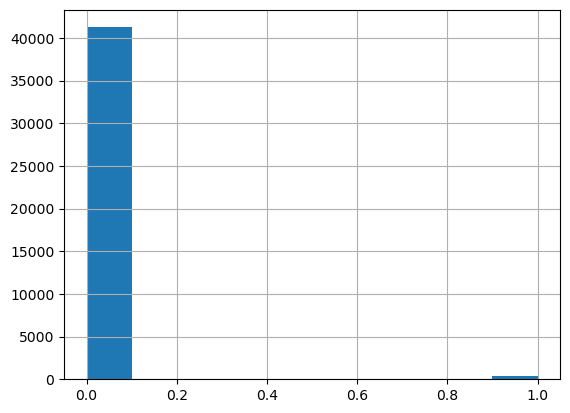

In [42]:
std_modeling['worthy'].hist()

# PCA

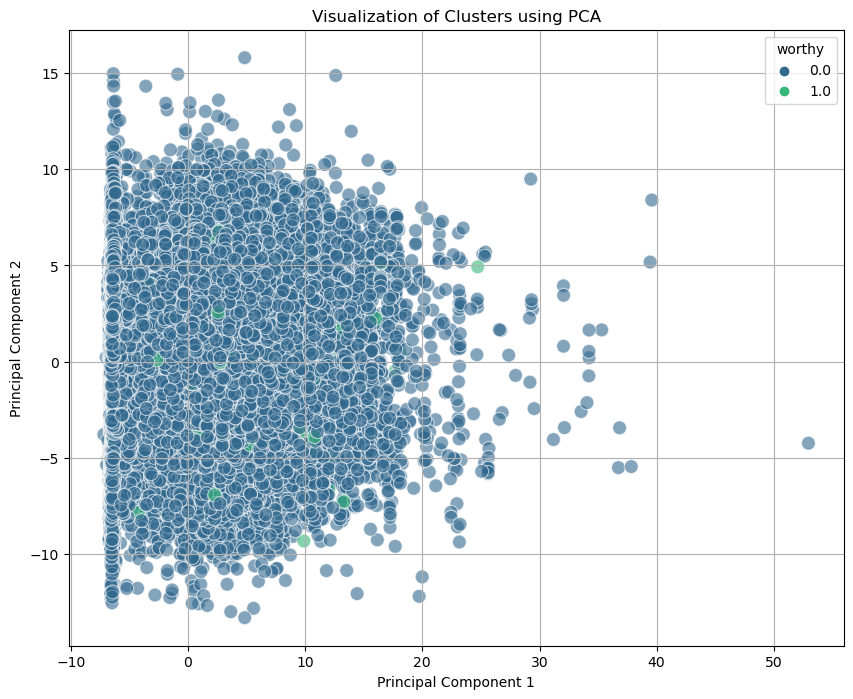

In [43]:
# Redukcja wymiarowości danych zakodowanych do 2 wymiarów
pca = PCA(n_components=2)
X_pca = pca.fit_transform(std_modeling.drop(columns='worthy'))

# Przygotowanie DataFrame do wizualizacji
clustered_data = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'worthy': std_modeling['worthy']
})

# Wykres rozrzutu z różnymi kolorami dla różnych klastrów
plt.figure(figsize=(10, 8))
sns.scatterplot(data=clustered_data, x='PCA1', y='PCA2', hue='worthy', palette='viridis', s=100, alpha=0.6)
plt.title('Visualization of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='worthy')
plt.grid(True)
plt.show()

In [44]:
# Redukcja wymiarowości danych zakodowanych do 3 wymiarów
pca = PCA(n_components=3)
X_pca = pca.fit_transform(std_modeling.drop(columns='worthy'))

# Przygotowanie DataFrame do wizualizacji
clustered_data = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'PCA3': X_pca[:, 2],
    'worthy': std_modeling['worthy']
})

# Interaktywny wykres 3D
fig = px.scatter_3d(clustered_data, x='PCA1', y='PCA2', z='PCA3', color='worthy', color_continuous_scale='viridis')
fig.update_layout(title='3D Visualization of Clusters using PCA', margin=dict(l=0, r=0, b=0, t=30))
fig.show()

# Outlier handling

## Isolation forest

In [45]:
# Utworzenie i dopasowanie modelu Isolation Forest
std_clf = IsolationForest(contamination=ISOLATION_FOREST_CONTAMINATION)
minmax_clf = IsolationForest(contamination=ISOLATION_FOREST_CONTAMINATION)

std_clf.fit(std_modeling)
minmax_clf.fit(minmax_modeling)

# Predykcje modelu
std_outlierfree = std_clf.predict(df) == 1  # -1 oznacza outlier
minmax_outlierfree = minmax_clf.predict(df) == 1  # -1 oznacza outlier

# Dane bez outliers
std_modeling_of = std_modeling[std_outlierfree]
minmax_modeling_of = minmax_modeling[minmax_outlierfree]

std_modeling_of.to_csv('data/std_modeling_OF.csv', index=False)
minmax_modeling_of.to_csv('data/minmax_modeling_OF.csv', index=False)

In [46]:
# Podsumowanie statystyczne
summary_before = df.describe()
summary_std_after = std_modeling_of.describe()
summary_minmax_after = minmax_modeling_of.describe()

# Liczba i procent usuniętych outliers
num_outliers_std = (~std_outlierfree).sum()
num_outliers_minmax = (~minmax_outlierfree).sum()

percent_outliers_std = num_outliers_std / len(df) * 100
percent_outliers_minmax = num_outliers_minmax / len(df) * 100

summary = {
    "Number of Outliers (Standard)": num_outliers_std,
    "Percent of Outliers (Standard)": percent_outliers_std,
    "Number of Outliers (Min-Max)": num_outliers_minmax,
    "Percent of Outliers (Min-Max)": percent_outliers_minmax
}

summary_df = pd.DataFrame([summary])

# Wyświetlenie podsumowania
print("Outliers Summary")
print(summary_df)
print("\nSummary Before Removal")
print(summary_before)
print("\nSummary After Standard Removal")
print(summary_std_after)
print("\nSummary After MinMax Removal")
print(summary_minmax_after)

Outliers Summary
   Number of Outliers (Standard)  Percent of Outliers (Standard)  \
0                          41564                           100.0   

   Number of Outliers (Min-Max)  Percent of Outliers (Min-Max)  
0                         41564                          100.0  

Summary Before Removal
        priceNative      priceUsd  txns_m5_buys  txns_m5_sells  txns_h1_buys  \
count  4.156400e+04  4.156400e+04  41564.000000   41564.000000  41564.000000   
mean   1.952230e+02  3.617005e+02     90.260706      48.743576     90.265278   
std    3.187944e+04  3.718330e+04     91.900598      80.607691     91.901064   
min    0.000000e+00  0.000000e+00      0.000000       0.000000      0.000000   
25%    3.367750e-08  5.084750e-06     36.000000       6.000000     36.000000   
50%    1.944000e-07  2.879000e-05     70.000000      27.000000     70.000000   
75%    8.326000e-07  1.231250e-04    124.000000      59.000000    124.000000   
max    6.452448e+06  6.202117e+06   1242.000000    1